A majority of the visualizations done in Python are made using a library called ``matplotlib``. As is the case with many of the libraries we are learning to use, ``matplotlib`` is quite big and extensive, and we'll be relying primarily on one of its submodules called ``pyplot``. Let's import ``pyplot``, and we'll give it an alias of ``plt`` since we'll be using it very frequently.

If you're using a notebook (as I am), you need to type a special line *before* you type any other code that takes the following form:

In [1]:
%matplotlib inline

Note that this isn't Python, it's actually a setting for the environment we're using, jupyter notebook. We're basically telling it to print images *inside* the notebook we're in. This is to ensure that we don't save the images to a file, or try to open the images in a console window. We want everything to show up right here in notebook.

In [2]:
import matplotlib.pyplot as plt
plt.ioff()

Now we have a variable called ``plt`` that respresents our ``pyplot``, our visualization "toolbox."

# A Two Dimensional Plot

We'll start with the easiest visualization possible: a two dimensional plot. There is an X-axis and a Y-axis. Each represents some quantity. A point on the plot represents some combination of the values for the X-axis and the Y-axis.

First, let's make some values to display. Let's say we have some data that tells us how many calls our company received during the hours of the day. There are 24 hours in the day, so there are 24 values. The first represents the number of calls from midnight to 1AM, the second represents the number of calls from 1AM to 2AM, and so on. 

In [3]:
no_of_phone_calls = [2, 4, 3, 2, 5, 4, 7, 10, 22, 32, 35, 34, 14, 10, 29, 35, 39, 31, 25, 24, 15, 11, 9, 4, 5]

We simply call the ``plot`` method of the ``plt`` object and pass it our data. It can't get simpler than this. 

In [4]:
plt.plot(no_of_phone_calls)

The output above acknowledges that the plot has been made - a 2D line. If you want to see it, call the ``show`` method on ``plt``.

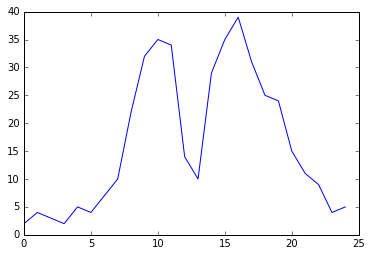

In [5]:
plt.show()

Alright! That's a start. We can see that calls increase dramatically during the work hours, then calls drop during lunchtime, volumen increases once more, then decreases more gradually in the evening. 

Visualization is all about *clarification*. The trend becomes much more visible when we can *see* it, rather than if we just looked at the list of numbers.

However, *clarification* is the goal there are still some major problems with this plot. First, a person seeing this for the first time will have no idea what the x- and y-axes represent. Second, an overall title would be helpful, and probably will be the first thing at viewer reads. So let's fix this.

*After* we make the plot, but *before* we show it, we can use:

* the ``xlabel`` method to label the x-axis
* the ``ylabel`` method to label the y-axis
* the ``title`` method to give the entire plot a title

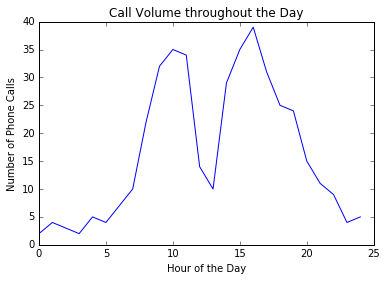

In [6]:
plt.plot(no_of_phone_calls)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Phone Calls")

plt.title("Call Volume throughout the Day")

plt.show()

Notice that we only supplied the ``plot`` method with *one set of values*, but our plot is actually dealing with two sets of values: hour of day, and number of phone calls. How did ``pyplot`` figure this out?

If you pass ``plot`` *only one set of values*, it will *assume those values are your y-axis values* and automatically make the *x-axis values a sequence starting from 0*. Basically, ``pyplot`` saw that the first value in ``no_of_phone_calls`` was 2, and then automatically assigned it to an x-value of 0. It saw that the second value was 4, and assigned it to an x-value of 1. 

# Passing x and y values

What if you're working with data that isn't sequential, starts at 0, and increases by a value of 1 like the hours of the day? In this case, we pass pyplot two lists: the first one representing the x-values and the second one representing the y values. 

Let's say in this scenario we only have phone call volume data from 6AM, 8AM, 10AM, 12PM, 2PM, 4PM, and 6PM. It doesn't increment at one and it doesn't start at 0. This time, we have to specify the x-axis values. 

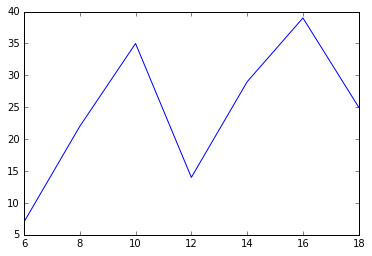

In [7]:
time_of_day = [6, 8, 10, 12, 14, 16, 18] # times are in the 24-hour clock
no_of_phone_calls = [7, 22, 35, 14,  29, 39, 25]

plt.plot(time_of_day, no_of_phone_calls)
plt.show()

# Non-sequential x and y values

Let's return to that height and weight scenario we had when learning linear regression. We'll have the x-axis represent height and the y-axis represent weight. I'll only generate 20 sets instead of 1000 sets of data so the plot isn't as cluttered.

In [8]:
import numpy as np

np.random.seed(3057)

heights = np.random.normal(113, 20, 20)
noise = np.random.normal(0, 5, 20)
weights = 25.39 + .34 * heights + noise

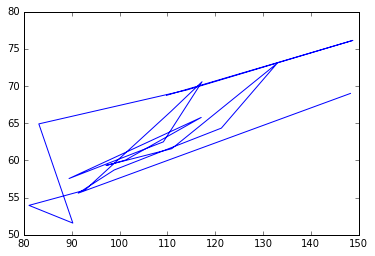

In [9]:
plt.plot(heights, weights)
plt.show()

Well, that's a mess. This is because by default, the ``plot`` function *draws a line between points*. So here, the point representing the height and weight of the first alien is linked to the point of the second alien with a line. The second is linked to the third, and so forth. 

One way we can address this is by providing a *third argument* to the plot function. This third argument is a string that will contain information about *how we want the plots to be displayed*. 

For example, if we provide the string ``"o"``, it means we want the points to be presented as unconnected dots. The reason why ``pyplot`` uses an ``o`` to represent this option is because ``o`` looks like a dot. 

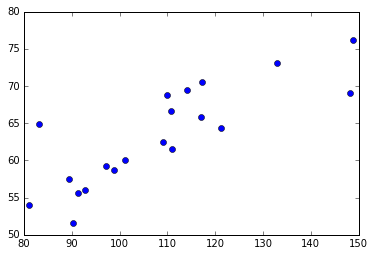

In [10]:
plt.plot(heights, weights, "o")
plt.show()

As a case in point, if we change the styling argument string to ``"x"``, the result is not surprising:

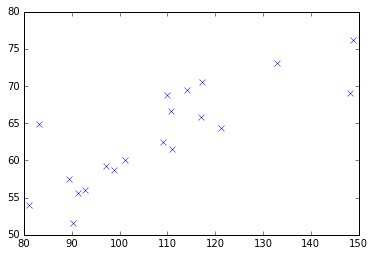

In [11]:
plt.plot(heights, weights, "x")
plt.show()

We can change the *color* of the points by adding an additional character to our format string. Put it before the character that designates the shape.

``"ro"``, for example, means "red circles." ``gx``, on the other hand, means "green x's".

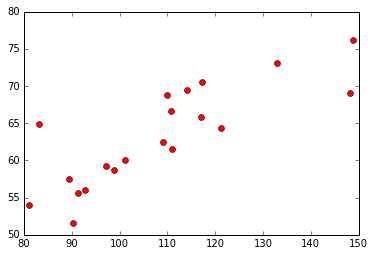

In [12]:
plt.plot(heights, weights, "ro")
plt.show()

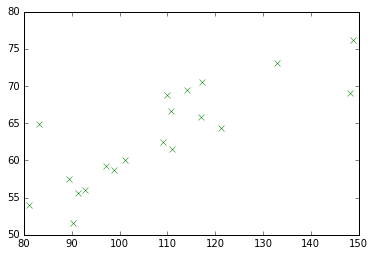

In [13]:
plt.plot(heights, weights, "gx")
plt.show()

# Categorical Data on a 2-D Plot

You can even plot different colors/shapes in the same plot. All you have to do is pass x values, y values, and a format string for the first set, *then* pass x values, y values, and a format string for the second set. You can do this *in the same call*. 

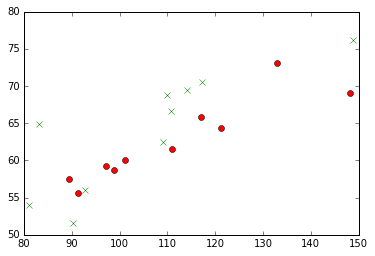

In [14]:
# Let set one be the first 10 measurements
set1_heights = heights[:10]
set1_weights = weights[:10]
# Set two is the last 10
set2_heights = heights[10:]
set2_weights = weights[10:]

# Now with one call, we plot both sets, but with different format strings
plt.plot(set1_heights, set1_weights, "ro", set2_heights, set2_weights, "gx")
plt.show()

## Iris Data with categories

Being able to change style and color is useful when you have a *third or fourth feature* that is *categorical* that must be visualized. Let's revisit the iris data, where we have three features: sepal length (continuous), sepal width (continuous), and species (categorical). 

Look at the code below carefully, because we'll have to *manipualte* the data so it's in the form that ``pyplot.plot`` needs.

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()

measurements = iris.data
print(measurements[:5])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


``measurements`` is a $150 \times 4$ matrix, each row is a sample, and the columns are sepal length, sepal width, petal length, and petal width. First, let's get only the sepal length and sepal width.

In [16]:
measurements = measurements[:, :2]

In [17]:
print(measurements[:5])

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]]


Now we have a lists of lists. But, if you remember what ``pyplot.plot`` needs, we need a *separate list* for the sepal lengths and a *separate list* for the sepal widths. We can use numpy's column/row slicing to extract a specific column.

In [18]:
slengths = measurements[:, 0] # Select all rows, but only the column at index 0
swidths = measurements[:, 1] # Select all rows, but only the column at index 1

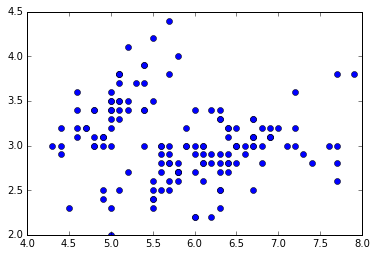

In [19]:
plt.plot(slengths, swidths, "o")
plt.show()

Now, we're lucky because we know from the scikit-learn documentation that the first 50 samples are the first species, the second 50 are the second, and the third 50 are the third. So we can separate them easily. 

In [20]:
setosa_slengths = slengths[:50]
setosa_swidths = swidths[:50]
versicolor_slengths = slengths[50:100]
versicolor_swidths = swidths[50:100]
virginica_slengths = slengths[100:]
virginica_swidths = swidths[100:]

Now we plot them all in the same call:

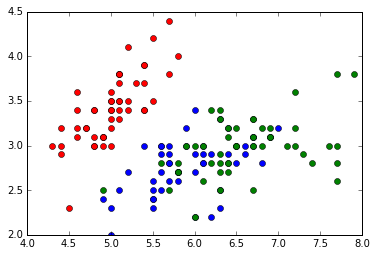

In [21]:
plt.plot(setosa_slengths, setosa_swidths, "ro", versicolor_slengths, versicolor_swidths, "bo", virginica_slengths, virginica_swidths, "go")
plt.show()

As I mentioned above, visualization is all about *clarification*, it's about making trends visible to the human mind: a mind that processes images far better than a matrix of numbers. With this visualization, we can see that setosa is quite seperated, while versicolor and virginica have considerable overlap. This would be extremely hard to do just looking at a list of numerical measurements.

But as I said, labels are a huge component of making a visualization comprehensible. In addition to a title and labels for the axes, now we could use a *legend*. 

To do this, we're going to create this plot differently. Rather than shoving all the information into a single call of ``plot``, we're going to make multiple calls to plot before calling ``plt.show()``. Each time we make a call, we're going to pass yet another argument, called ``label``, which will give a name to the set we're plotting. 

In [22]:
plt.plot(setosa_slengths, setosa_swidths, "ro", label="I. Setosa")
plt.plot(versicolor_slengths, versicolor_swidths, "bo", label="I. Versicolor")
plt.plot(virginica_slengths, virginica_swidths, "go", label="I. Virginica")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs. Width in Iris Species")

Now that we've provided each separate set of data with a ``label``, all we need to do is call an additional method called ``legend`` before we call ``show``.

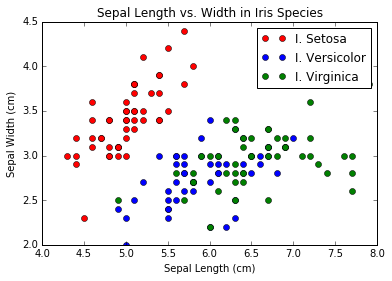

In [23]:
plt.legend()
plt.show()

Notice that the legend is covering up two data points, and that there's a blue point at length=5.0 and width = 2.0 that is just barely appearing on the graph. A super obvious solution to this problem is to make the x and y axes large. We can manually set the *minimum* and *maximum* value of each axes with the ``xlim`` and ``ylim`` methods, respectively. These methods take a list of two items, the first being the new minimum and the second being the new maximum. I'm going to add 0.5 cm to both ends of each axis. 

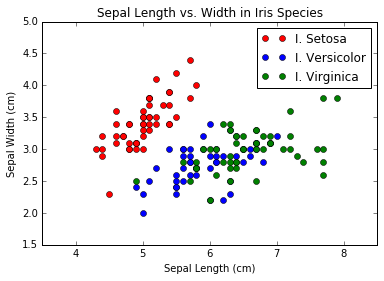

In [24]:
plt.plot(setosa_slengths, setosa_swidths, "ro", label="I. Setosa")
plt.plot(versicolor_slengths, versicolor_swidths, "bo", label="I. Versicolor")
plt.plot(virginica_slengths, virginica_swidths, "go", label="I. Virginica")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs. Width in Iris Species")

plt.xlim([3.5, 8.5])
plt.ylim([1.5, 5])

plt.legend()
plt.show()

As you can see, we've "stretched" the axes, so all the datapoints are fully in the plot. 

# Visualizing Features

## Boxplots

The visualizations we covered above are interesting, yet contrived: in the heights/weights scenario, we had one predictor variable and one outcome variable. In the Iris scenario, we had two continuous measurements - sepal length and sepal width - and one categorical variable. Realistically speaking, Social Media data will have **many** features, far more than two or three - in other words, their dimensionality will be high. From a mathematical standpoint, algorithms like linear regression and k-NN clustering have no problems whatsoever executing their processes in higher-dimensional space, but for us humans there is no possible way to visualize them. 

For example, we know the Iris data has 4 features, lengths and widths of both sepals and petals. We've only been using two dimensions to visualize things, but obviously a classifier would perform better at classifying flowers if it had *all four* features available to it. We wouldn't be able to make visualizations incorporating all four of those features at the same time, however.

Sometimes, its useful to visualize a single feature, just so you can get an intuition about how your samples vary at least along one dimension. One way to do this is using boxplots. The command is ``plt.boxplot``. Here, I'm going to make a boxplot of all the sepal lengths in the Iris dataset. 

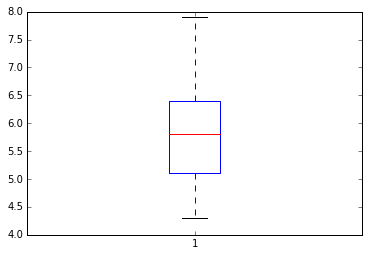

In [25]:
plt.boxplot(slengths)
plt.show()

Boxplots seem pretty difficult to read at first, but once you learn what they represent they turn out to be very handy representations. 

The **red line** is the median value of the data. This means that 50% of the data points are above this value and 50% of the data points are below this value. For our data this looks to be around 5.7 or 5.8. 

The **upper edge** of the box represents the second quartile - the 75% quantile. This means 75% of the data points are below this value (and, of course, 25% are above it). For this data, this looks to be around 6.3.

The **lower edge** of the box represents the first quartile, or the 25% quantile. 25% of the data points are below this value and 75% of the datapoints are above this value. 

The upper **whisker** - the horizontal line on top of the vertical dotted line - represents the lowest datum that is still within 1.5 times the **Interquantile Range** which is basically the hight of the box. This is a somewhat arbitrary distance, but traditionally this means that anything above the upper edge of the box but below the upper whisker is unusually large, but still not an outlier. The lower whisker is this same principle in reverse.

Sometimes, you'll see little plus signs above or below the whiskers. These are outliers - data that are more than 1.5 times the Interquantile Range from the closest box edge. These values are *unusually* large or small. Seeing a huge amount of outliers draws your attention to potential error data points, or indicates that the distribution of this feature might be skewed. There are no outliers in this plot. 

Boxplots are particularly useful for side-by-side comparisons of feature distributions. Instead of visualizing *all* of the sepal lengths, we can make one box plot per sepal length species and draw them side by side:

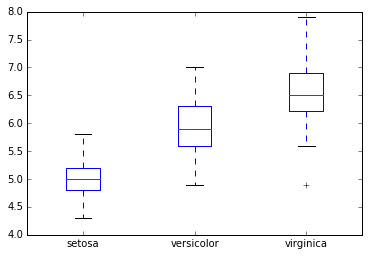

In [26]:
plt.boxplot([setosa_slengths, versicolor_slengths, virginica_slengths], labels=["setosa", "versicolor", "virginica"])
plt.show()

There's a lot we can learn from a simple glance at this visualization. Setosa has shorter sepals, virginica has the longest sepals, and versicolor is in between. Setosa has a pretty narrow spread - a restriction on what we would expect to see, while virginica has a pretty wide spread, including one outlier - depicted as a plus sign in the visualization - that is so narrow it's even below the median value for setosa. The range of versicolor's sepal length is completely within the upper end of setosa and the lower end of virginica, so using this feature alone, it would be difficult to see if a given sepal length represents a longer-than-normal setosa, a shorter-than-normal virginica, or an average-length versicolor. 

Similar insights can be gained if we visualize the widths. This time, I'll make sure to practice good infoviz and label the visualization. 

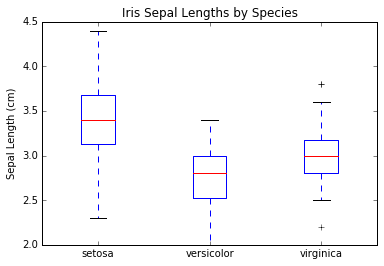

In [27]:
plt.boxplot([setosa_swidths, versicolor_swidths, virginica_swidths], labels=["setosa", "versicolor", "virginica"])
plt.ylabel("Sepal Length (cm)")
plt.title("Iris Sepal Lengths by Species")
plt.show()

## Histograms

Another way to visualize a single feature is to use a histogram. This is just one method that gives us a better idea of the "shape" of the distribution than a boxplot. 

In a histogram, we have a finite set of bins arrayed on the x-axis. The hight of each column simply represents the number of data points that fall within a given bin. Here, we'll have the x-axis represent sepal length again. The method to use is ``hist``. 

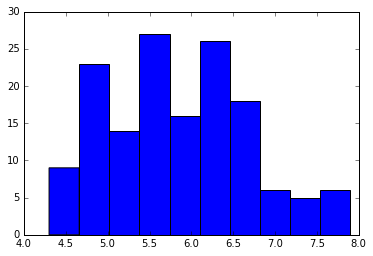

In [28]:
plt.hist(slengths)
plt.show()

As you can imagine, the way a histogram looks depends highly on the amount of bins. the ``hist`` function takes an argument ``bins`` where you can manually indicate how many bins you want. 

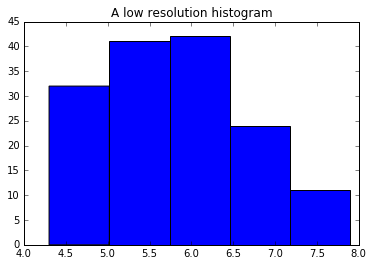

In [29]:
plt.hist(slengths, bins=5)
plt.title("A low resolution histogram")
plt.show()

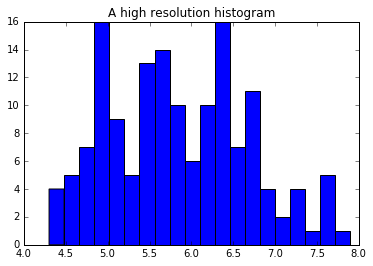

In [30]:
plt.hist(slengths, bins=20)
plt.title("A high resolution histogram")
plt.show()

As a general principle, a lower amount of bins smooths out the visualization, at the cost of detail, while a higher amount of bins retains detail but may obscure trends. To illustrate with extreme instances:

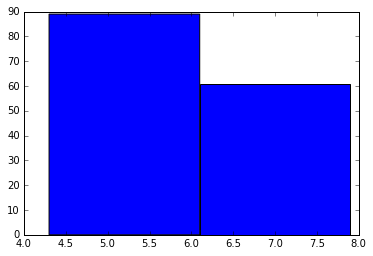

In [31]:
plt.hist(slengths, bins=2)
plt.show()

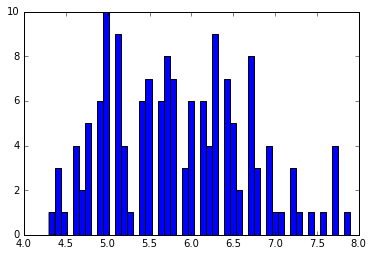

In [32]:
plt.hist(slengths, bins=50)
plt.show()

## Bar Charts

The bar chart is probably the most common information visualization out there. It's handy when you're using **count data** and the items your counting **has no inherent order**. For the histogram, the items represented on the x-axis *are* in order, e.g. 5.0 centimeters is bigger than 4.5 centimeters. But when your counting categories, the one category (like Iris Setosa) isn't "higher" or "lower" than another (like Iris Versicolor). 

Let's get the latest 500 Tweets from Trumps twitter feed, count the words in it, and make a bar chart of word frequency. 

In [33]:
API_KEY = ""
API_SECRET = ""
import tweepy
auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

c = tweepy.Cursor(api.user_timeline, id="realDonaldTrump")

tweet_texts = []

for status in c.items(500):
    tweet_texts.append(status.text)

Now I'm going to use list comprehension and a method all strings have called ``lower`` to change everything to lowercase. That way, we don't distinguish between "the" and "The".

In [34]:
tweet_texts = [x.lower() for x in tweet_texts]
print(tweet_texts[0])

what an amazing comeback and win by the patriots. tom brady, bob kraft and coach b are total winners. wow!


Next, I'm going to use another method all strings have called ``split``, which takes a string and splits it on spaces, turning it into a list of words. 

In [35]:
tweet_texts = [x.split() for x in tweet_texts]
print(tweet_texts[0])

['what', 'an', 'amazing', 'comeback', 'and', 'win', 'by', 'the', 'patriots.', 'tom', 'brady,', 'bob', 'kraft', 'and', 'coach', 'b', 'are', 'total', 'winners.', 'wow!']


After that, I'm going to import a handy factory function called ``Counter`` from the module ``collections``, which does what its name implies: it counts unique items in any sequence that is passed to it.

``Counter`` is a "factory method" so first we're going to make an *instance* of a counter, and call it ``word_frequency``.

Finally, we iterate through all the tweets and use a method on ``word_frequency`` called ``update``. This basically means: take the list I'm giving you, and update all your counts. We use a for loop to pass it all the tweets. 

In [36]:
from collections import Counter
word_frequency = Counter()
for x in tweet_texts:
    word_frequency.update(x)

All Counter instances have a method called ``most_common`` that tells us what the most common item is, and their frequency. You pass it a number as an argument: how many of the most common items do you want to see? Here, we're looking at the first 20.

In [37]:
top20 = word_frequency.most_common(20)

print(top20)

[('the', 435), ('to', 280), ('and', 223), ('of', 191), ('a', 158), ('in', 152), ('is', 128), ('will', 123), ('i', 120), ('for', 112), ('be', 98), ('on', 88), ('that', 80), ('with', 79), ('great', 76), ('it', 70), ('-', 67), ('we', 64), ('our', 63), ('have', 62)]


Alright, this is a list of tuples, where in each tuple the first value is the word, and the second item is the frequency. Let's pull these apart, so we have a list of words and a list of frequencies. I'll use list comprehensions to do this.

In [38]:
top_words = [x[0] for x in top20]
top_frequencies = [x[1] for x in top20]
print(top_words[:5])
print("*"*50)
print(top_frequencies[:5])

['the', 'to', 'and', 'of', 'a']
**************************************************
[435, 280, 223, 191, 158]


Now we can finally make our bar chart. The method is ``bar`` and it takes two arguments: *where* on the x-axis a bar should show up, and *how tall it should be*. We have the bar heights in the variable ``top_frequencies``. As to *where* it should be on the x-axis, the most obvious choice to make is to be on positions 0 through 20 (since we are displaying 20 bars). 

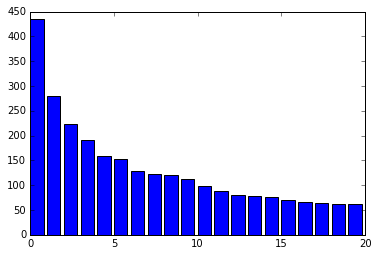

In [39]:
x_positions = np.arange(20)

plt.bar(x_positions, top_frequencies)
plt.show()

We need to improve this bar chart by actually labeling the x-axis with the words themselves. We can label the x-axis ticks with a pyplot method called ``xticks``. It takes three arguments: *where* on the x-axis the labels should go, what the labels are, and a third named argument called ``rotation`` which indicates *how much the labels should be rotated*. We have the labels in the variable ``top_words``. These words would be crowded if displayed on the x-axis horizontally so I'm going to rotate them 90 degrees so they're displayed vertically. 

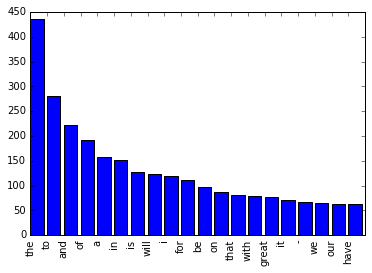

In [40]:
plt.bar(x_positions, top_frequencies)
plt.xticks(x_positions, top_words, rotation=90)
plt.show()

We're not quite there yet - notice the words are in weird positions. "The" is *exactly* at position 0 on the x-axis, "to" is exactly on position 1. It'd look nicer if the words were directly under the bars that represent them. We can do this by putting "the" at position 0.5 and "to" at position 1.5 and so on - nudging everything by 0.5. This is easy to do: and we'll also add labels this time. 

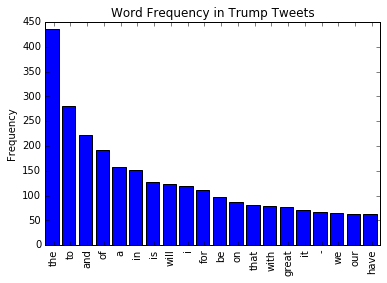

In [41]:
plt.bar(x_positions, top_frequencies)
plt.xticks(x_positions + 0.5, top_words, rotation=90) # Notice we're nudging x-tick values by 0.5
plt.title("Word Frequency in Trump Tweets")
plt.ylabel("Frequency")
plt.show()

# Visualizations for your Methods, not your Data

The above was a quick overview of ways you can visualize your data. However, as we discussed, sometimes the data is of very high dimensionality and is a bit more difficult to visualize. In the world of statistical learning, however, we just as often - if not more often - resort to visualizations not to illustrate the data, but the *performance of our classifier*. 

Take, for example, our discussion of the k-NN classifier. This classifier had a *hyperparameter* that must be set *before the model is trained* - namely, the value of k: how many neighors should we consider when classifying a new instance?

Many of you asked how to find an optimal value of k. There is, of course, no "universal" optimal value: it all depends on the data. Why not try many, many values of k and see which provides the highest accuracy? A visualization will help greatly with this. 

What I'll do is I'll use the Iris data, split it into train and test, and train a k-NN classifier. Unlike last time, we'll use all 4 measurements. We'll use a for loop to try *many* values of k, and then measure accuracy on the test set. Then, we'll visualize the accuracy and see if there's a "highest point" on the plot that represents the value of k that gives us the highest accuracy. 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=9876)

First, let's collect a set of numbers to serve as the values of ``k`` we'll use. I'm going to use every odd number from 1 to 99 - I'm sticking to odd numbers so that there's never a tie among the neighbors (for example, if we used 4-nearest neighbors, there may be 2 neighors in category versicolor and 2 neighbors in category setosa, so there'd have to be some sort of tie-breaker). 

I'll use a handy numpy method called ``arange`` to generate these values. It takes 3 arguments: where you start, where end, and the size of the increment. Note that the 2nd argument - the end value - *is not included in the resulting list of numbers*, so I'm going to make my end value **100** so that 99 is included.

In [49]:
k_values = np.arange(1, 100, 2)
print(k_values)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99]


Now let's train a bunch of classifiers! I'm going to initialize an empty list called ``accuracies`` that will save each accuracy per value of ``k``. 

In [50]:
accuracies = []

for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true = y_test
    accuracy = accuracy_score(y_true, y_pred)
    accuracies.append(accuracy)

Now that we have our k-values and our accuracies stored in lists, we can visualize it with a basic plot to see the trend. 

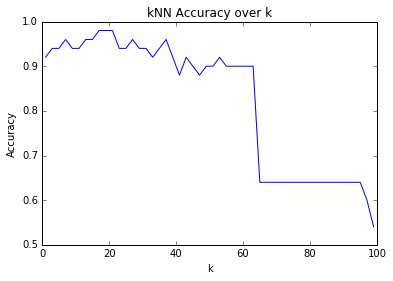

In [51]:
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("kNN Accuracy over k")
plt.show()

We can see that the optimal value is not 1, but it's close. After peaking early, the accuracy drops off gradually, then quickly. Now that this visualization gave us an idea of *where* the best k value is located, we can slice our list of accuracies accordingly. 

In [52]:
k_accuracies = list(zip(k_values, accuracies))
k_accuracies[5:15]

[(11, 0.93999999999999995),
 (13, 0.95999999999999996),
 (15, 0.95999999999999996),
 (17, 0.97999999999999998),
 (19, 0.97999999999999998),
 (21, 0.97999999999999998),
 (23, 0.93999999999999995),
 (25, 0.93999999999999995),
 (27, 0.95999999999999996),
 (29, 0.93999999999999995)]

We got the highest accuracy of 98% when $k=17$, $k=19$, or $k=21$.

Note that k being relatively small is a property of this data - the optimal value of k could be wildly different on a different dataset.

# The Tip of the Iceberg

As I've said before with ``numpy`` and ``sklearn``, I'm only able to show you small portions of what are truly giant libraries. ``matplotlib`` is no exception. What we've covered today should meet most of your visualization needs in this class, but there are other plot styles you can use with ``matplotlib`` as well. But in my experience, more than anything else, the vast majority of methods and options in pyplot are about customizing plots - changing colors, changing labels, and so forth. If you want to do this with one of your visualizations, check out the documentation, but, as always, don't hesitate to contact me if you need help. 